In [7]:
# import python packages needed
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
import sklearn as sk
from local import config as local_conf

# References

## [Spotify Developer Account](https://developer.spotify.com/dashboard/login)

## [Authorization Guide (Client Credentials Flow)](https://developer.spotify.com/documentation/general/guides/authorization-guide/#client-credentials-flow)

## [Web API Reference](https://developer.spotify.com/documentation/web-api/reference/)

## [Spotipy Documentation](https://spotipy.readthedocs.io/en/2.16.1/#spotipy.client.Spotify.playlist_tracks)

## [Spotipy GitHub Examples](https://github.com/plamere/spotipy/tree/master/examples)

## [Spotify Features Analysis](https://rpubs.com/PeterDola/SpotifyTracks)


In [2]:
# create our connection to the API
# client_id = '' # put your own client id
# client_secret = '' # put your own client secret
username = "megraswan" # username

In [3]:
# connect
client_credentials_manager = SpotifyClientCredentials(local_conf.CLIENT_ID, local_conf.CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
# playlist ID you would like to get track data from 
pl_id = 'spotify:playlist:1kthr7VG9a1oGC4bQixTas'

# playlist_items() gets each item from the playlist
response = sp.playlist_items(pl_id,
                                limit=1, # maximum number of tracks to return
                                offset=0, # the index of the first track to return
                                fields='total', # which fields to return
                                additional_types=['track']) # list of item types to return (we want tracks)
total_num_tracks = response['total'] # total_num_tracks stores total number of tracks in playlist

offset = 0 # will act as a pointer after every 100 tracks we go through
limit = 100
# print(total_num_tracks, int(total_num_tracks/limit))

dfs = [] # data frames list
for n in range(int(total_num_tracks/limit)+1): # we want to iterate 10 times bc we have 909 tracks in this cases (we will get data for every 100 tracks each loop)
    response = sp.playlist_items(pl_id,
                                limit=limit,
                                offset=offset, 
                                fields='items.track.id,items.track.name,items.track.artist,items.track.track_number,items.track.duration_ms,items.track.id,total',
                                additional_types=['track']) 

    # pprint(response)
    track_ids = []
    tracks = []    
    for item in response['items']: # item is a dictionary that has dictionaries
        track_ids.append(item['track']['id']) # in the dictionary "item", we are getting the value for key "id" from dictionary "track"
        # {"items": {"track": {"id": '17CPezzLWzvGfpZW6X8XT0'}}}
        # storing dictionary in track_info
        track_info = {  "name":item['track']['name'],
                        "duration_ms":item['track']['duration_ms'],
                        "track_number":item['track']['track_number']    }
        # {"items": {"track": {"name": 'Say You, Say Me'}}}
        # {"items": {"track": {"duration_ms": 241066}}}
        # {"items": {"track": {"track_number": 8}}}
        tracks.append(track_info)

    # get audio features from each track id from track_ids list
    features = sp.audio_features(tracks=track_ids)

    # print(len(tracks))

    # for every rack, add/combine features list items to tracks list (both have dictionaries so we combine dictionaries)
    for idx in range(len(tracks)):
        tracks[idx].update(features[idx]) 

    df = pd.DataFrame(tracks) # create data frame df of tracks list
    dfs.append(df) # add data frame to dfs list
    # pprint(features)

    if len(response['items']) == 0: # if no items, exit loop
        break

    offset = offset + len(response['items']) # increment offset by length of items in loop (move pointer every 100 items until it reaches end of tracks)
    print(offset, "/", response['total']) # display how many tracks we went through after each loop out of total number of tracks

# Put all songs in 1 DataFrame
df_combo = pd.concat(dfs) # combine the data frames in the dfs list to 1 data frame
df_combo.head() # print first few rows of data frame

100 / 911
200 / 911
300 / 911
400 / 911
500 / 911
600 / 911
700 / 911
800 / 911
900 / 911
911 / 911


,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,Every Breath You Take,253920,7,0.820,0.452,1,-9.796,1,0.0348,0.5430,0.002940,0.0714,0.740,117.401,audio_features,1JSTJqkT5qHq8MDJnJbRE1,spotify:track:1JSTJqkT5qHq8MDJnJbRE1,https://api.spotify.com/v1/tracks/1JSTJqkT5qHq...,https://api.spotify.com/v1/audio-analysis/1JST...,4
1,Don't You (Forget About Me),263040,1,0.660,0.816,2,-6.610,1,0.0299,0.1680,0.018100,0.0608,0.678,111.346,audio_features,3fH4KjXFYMmljxrcGrbPj9,spotify:track:3fH4KjXFYMmljxrcGrbPj9,https://api.spotify.com/v1/tracks/3fH4KjXFYMml...,https://api.spotify.com/v1/audio-analysis/3fH4...,4
2,Take on Me,225280,1,0.573,0.902,6,-7.638,0,0.0540,0.0180,0.001250,0.0928,0.876,84.412,audio_features,2WfaOiMkCvy7F5fcp2zZ8L,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,https://api.spotify.com/v1/tracks/2WfaOiMkCvy7...,https://api.spotify.com/v1/audio-analysis/2Wfa...,4
3,Livin' On A Prayer,249293,3,0.534,0.887,0,-3.777,1,0.0345,0.0768,0.000099,0.3250,0.720,122.494,audio_features,0J6mQxEZnlRt9ymzFntA6z,spotify:track:0J6mQxEZnlRt9ymzFntA6z,https://api.spotify.com/v1/tracks/0J6mQxEZnlRt...,https://api.spotify.com/v1/audio-analysis/0J6m...,4
4,If You Leave Me Now,235373,4,0.434,0.563,11,-6.784,1,0.0268,0.0197,0.000824,0.1280,0.275,104.183,audio_features,0KMGxYKeUzK9wc5DZCt3HT,spotify:track:0KMGxYKeUzK9wc5DZCt3HT,https://api.spotify.com/v1/tracks/0KMGxYKeUzK9...,https://api.spotify.com/v1/audio-analysis/0KMG...,4


In [5]:
df_combo

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,Every Breath You Take,253920,7,0.820,0.452,1,-9.796,1,0.0348,0.5430,0.002940,0.0714,0.740,117.401,audio_features,1JSTJqkT5qHq8MDJnJbRE1,spotify:track:1JSTJqkT5qHq8MDJnJbRE1,https://api.spotify.com/v1/tracks/1JSTJqkT5qHq...,https://api.spotify.com/v1/audio-analysis/1JST...,4
1,Don't You (Forget About Me),263040,1,0.660,0.816,2,-6.610,1,0.0299,0.1680,0.018100,0.0608,0.678,111.346,audio_features,3fH4KjXFYMmljxrcGrbPj9,spotify:track:3fH4KjXFYMmljxrcGrbPj9,https://api.spotify.com/v1/tracks/3fH4KjXFYMml...,https://api.spotify.com/v1/audio-analysis/3fH4...,4
2,Take on Me,225280,1,0.573,0.902,6,-7.638,0,0.0540,0.0180,0.001250,0.0928,0.876,84.412,audio_features,2WfaOiMkCvy7F5fcp2zZ8L,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,https://api.spotify.com/v1/tracks/2WfaOiMkCvy7...,https://api.spotify.com/v1/audio-analysis/2Wfa...,4
3,Livin' On A Prayer,249293,3,0.534,0.887,0,-3.777,1,0.0345,0.0768,0.000099,0.3250,0.720,122.494,audio_features,0J6mQxEZnlRt9ymzFntA6z,spotify:track:0J6mQxEZnlRt9ymzFntA6z,https://api.spotify.com/v1/tracks/0J6mQxEZnlRt...,https://api.spotify.com/v1/audio-analysis/0J6m...,4
4,If You Leave Me Now,235373,4,0.434,0.563,11,-6.784,1,0.0268,0.0197,0.000824,0.1280,0.275,104.183,audio_features,0KMGxYKeUzK9wc5DZCt3HT,spotify:track:0KMGxYKeUzK9wc5DZCt3HT,https://api.spotify.com/v1/tracks/0KMGxYKeUzK9...,https://api.spotify.com/v1/audio-analysis/0KMG...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Miss Sarajevo,310907,6,0.719,0.582,4,-11.091,1,0.0254,0.5090,0.721000,0.1080,0.383,105.078,audio_features,6x5pI6n5feaWcP8jCdTk3E,spotify:track:6x5pI6n5feaWcP8jCdTk3E,https://api.spotify.com/v1/tracks/6x5pI6n5feaW...,https://api.spotify.com/v1/audio-analysis/6x5p...,4
7,Roam,295133,6,0.636,0.939,9,-5.551,1,0.0837,0.0485,0.000007,0.2710,0.694,134.937,audio_features,5fqcIHU6DhQtFKVO5XSdQs,spotify:track:5fqcIHU6DhQtFKVO5XSdQs,https://api.spotify.com/v1/tracks/5fqcIHU6DhQt...,https://api.spotify.com/v1/audio-analysis/5fqc...,4
8,The Living Years,330267,2,0.518,0.417,8,-13.268,1,0.0325,0.5800,0.000000,0.0722,0.311,97.630,audio_features,7tJnjRY2js0yXtNUWE4fgF,spotify:track:7tJnjRY2js0yXtNUWE4fgF,https://api.spotify.com/v1/tracks/7tJnjRY2js0y...,https://api.spotify.com/v1/audio-analysis/7tJn...,4
9,Taken In,256840,9,0.759,0.292,11,-17.189,1,0.0401,0.5840,0.000047,0.0791,0.701,93.011,audio_features,2JzPnd5bmNBHri3hBBEXZF,spotify:track:2JzPnd5bmNBHri3hBBEXZF,https://api.spotify.com/v1/tracks/2JzPnd5bmNBH...,https://api.spotify.com/v1/audio-analysis/2JzP...,4


In [6]:
# check for missing values
# nothing is missing wooooooo
df_combo.isnull().mean()

name                0.0
duration_ms         0.0
track_number        0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
type                0.0
id                  0.0
uri                 0.0
track_href          0.0
analysis_url        0.0
time_signature      0.0
dtype: float64

In [7]:
# correlation
df_combo.corr()

,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
duration_ms,1.000000,-0.011014,-0.112317,-0.082685,0.032821,-0.085730,-0.038974,-0.042809,0.037152,0.090817,0.046005,-0.212596,-0.017665,-0.021648
track_number,-0.011014,1.000000,-0.015830,-0.091962,0.021338,-0.029941,-0.024679,-0.044235,0.021086,0.093673,-0.018899,-0.084590,-0.084208,-0.039708
danceability,-0.112317,-0.015830,1.000000,0.081143,0.016579,0.006225,-0.085591,0.071981,-0.097510,0.049547,-0.138121,0.536566,-0.205687,0.129238
energy,-0.082685,-0.091962,0.081143,1.000000,-0.048989,0.730693,-0.059107,0.224213,-0.608089,0.041756,0.158003,0.527140,0.187699,0.152790
key,0.032821,0.021338,0.016579,-0.048989,1.000000,-0.032075,-0.097860,0.013291,0.030441,-0.031781,-0.004116,-0.024520,-0.049277,-0.027446
loudness,-0.085730,-0.029941,0.006225,0.730693,-0.032075,1.000000,-0.025763,0.102613,-0.387868,-0.028545,0.125514,0.218589,0.086575,0.054038
mode,-0.038974,-0.024679,-0.085591,-0.059107,-0.097860,-0.025763,1.000000,-0.054294,0.108591,0.004598,0.034054,-0.109576,-0.012264,-0.009986
speechiness,-0.042809,-0.044235,0.071981,0.224213,0.013291,0.102613,-0.054294,1.000000,-0.146682,-0.005049,0.048876,0.167060,0.109436,0.061444
acousticness,0.037152,0.021086,-0.097510,-0.608089,0.030441,-0.387868,0.108591,-0.146682,1.000000,-0.019165,-0.048967,-0.373690,-0.115464,-0.161542
instrumentalness,0.090817,0.093673,0.049547,0.041756,-0.031781,-0.028545,0.004598,-0.005049,-0.019165,1.000000,-0.026320,0.048444,-0.014210,0.016619


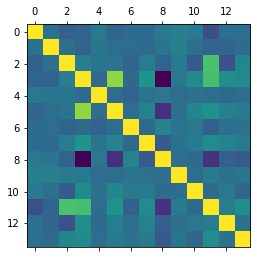

In [8]:
# plot correlation
plt.matshow(df_combo.corr())
plt.show()

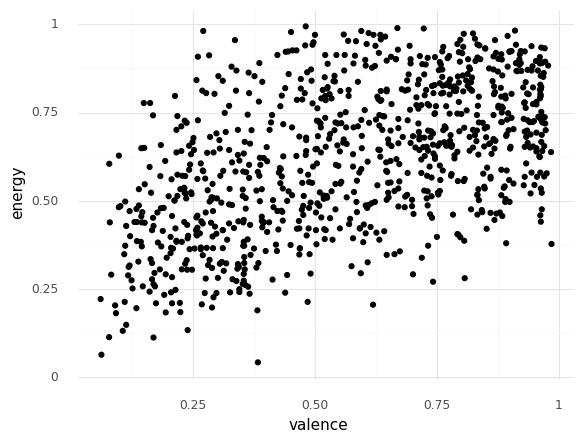

<ggplot: (8793068931821)>

In [9]:
(ggplot(df_combo, aes(x = "valence", y = "energy")) + 
geom_point() + 
theme_minimal())

In [10]:
# valence and energy values
valence_energy = ["name", "valence", "energy"]

In [11]:
large_valence_df = df_combo.nlargest(50, "valence") #highest valence in our entire dataset
# large_valence_df
large_valence_df.head()

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
58,What a Fool Believes,223867,2,0.758,0.378,8,-15.308,0,0.0449,0.28400,0.000000,0.0490,0.985,120.736,audio_features,2yBVeksU2EtrPJbTu4ZslK,spotify:track:2yBVeksU2EtrPJbTu4ZslK,https://api.spotify.com/v1/tracks/2yBVeksU2Etr...,https://api.spotify.com/v1/audio-analysis/2yBV...,4
13,She Works Hard For The Money,320840,1,0.758,0.638,8,-13.010,0,0.0378,0.00486,0.014100,0.0938,0.984,136.502,audio_features,3FlOciKDqFlTMPeC7t92Qy,spotify:track:3FlOciKDqFlTMPeC7t92Qy,https://api.spotify.com/v1/tracks/3FlOciKDqFlT...,https://api.spotify.com/v1/audio-analysis/3FlO...,4
36,Material Girl,240280,20,0.742,0.883,0,-3.419,1,0.0329,0.33300,0.000008,0.0964,0.978,136.506,audio_features,5pJCPFqScbHTESXDFesPb1,spotify:track:5pJCPFqScbHTESXDFesPb1,https://api.spotify.com/v1/tracks/5pJCPFqScbHT...,https://api.spotify.com/v1/audio-analysis/5pJC...,4
75,Addicted To Love,363640,3,0.702,0.578,2,-13.415,1,0.0310,0.38200,0.000006,0.0425,0.975,111.617,audio_features,5izGeTxueiFX1UPFGohY9w,spotify:track:5izGeTxueiFX1UPFGohY9w,https://api.spotify.com/v1/tracks/5izGeTxueiFX...,https://api.spotify.com/v1/audio-analysis/5izG...,4
16,Bad Girls,295107,2,0.857,0.700,2,-14.506,0,0.0358,0.00387,0.016400,0.4110,0.973,120.529,audio_features,1ibRqifchaAfeNdQGpbRVW,spotify:track:1ibRqifchaAfeNdQGpbRVW,https://api.spotify.com/v1/tracks/1ibRqifchaAf...,https://api.spotify.com/v1/audio-analysis/1ibR...,4


In [12]:
# only want valence and energy info
large_valence = large_valence_df[valence_energy]
large_valence

,name,valence,energy
58,What a Fool Believes,0.985,0.378
13,She Works Hard For The Money,0.984,0.638
36,Material Girl,0.978,0.883
75,Addicted To Love,0.975,0.578
16,Bad Girls,0.973,0.700
90,Hungry Heart,0.972,0.894
19,Rasputin - Single Version,0.972,0.719
39,Start Me Up - Remastered 2009,0.971,0.932
62,Hurts So Good,0.971,0.737
39,Like a Virgin,0.970,0.655


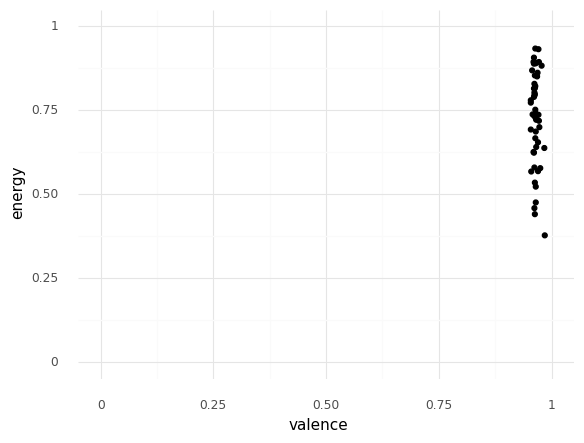

<ggplot: (8793069035565)>

In [13]:
(ggplot(large_valence_df, aes(x = "valence", y = "energy")) + 
geom_point() + 
theme_minimal() +
expand_limits(x = 0, y = 0) + 
xlim(0, 1)+ ylim(0, 1))

In [14]:
large_energy_df = df_combo.nlargest(50, "energy") #highest energy in our entire dataset
# large_energy_df
large_energy_df.head()

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
97,We Got The Beat,153133,6,0.587,0.994,2,-5.610,1,0.0450,0.15500,0.073400,0.0319,0.481,151.941,audio_features,5kz9GDBTX846OXwqWoyKzF,spotify:track:5kz9GDBTX846OXwqWoyKzF,https://api.spotify.com/v1/tracks/5kz9GDBTX846...,https://api.spotify.com/v1/audio-analysis/5kz9...,4
96,Suedehead - 2011 Remaster,235520,7,0.529,0.989,2,-4.500,1,0.0420,0.00126,0.001480,0.0567,0.669,142.290,audio_features,76HJoPhDFxD7rizsbCmZND,spotify:track:76HJoPhDFxD7rizsbCmZND,https://api.spotify.com/v1/tracks/76HJoPhDFxD7...,https://api.spotify.com/v1/audio-analysis/76HJ...,4
86,Tell It to My Heart,220880,1,0.638,0.988,1,-5.042,1,0.0921,0.03020,0.000012,0.3710,0.723,117.955,audio_features,3YVPpVJvJG2EauXurPA90F,spotify:track:3YVPpVJvJG2EauXurPA90F,https://api.spotify.com/v1/tracks/3YVPpVJvJG2E...,https://api.spotify.com/v1/audio-analysis/3YVP...,4
6,Dude (Looks Like A Lady),265773,5,0.540,0.982,4,-2.962,0,0.0458,0.43500,0.000034,0.0457,0.910,126.294,audio_features,6gQUbFwwdYXlKdmqRoWKJe,spotify:track:6gQUbFwwdYXlKdmqRoWKJe,https://api.spotify.com/v1/tracks/6gQUbFwwdYXl...,https://api.spotify.com/v1/audio-analysis/6gQU...,4
14,Kickstart My Heart,282653,5,0.359,0.981,7,-3.622,0,0.3030,0.00125,0.002360,0.2840,0.271,178.980,audio_features,7GonnnalI2s19OCQO1J7Tf,spotify:track:7GonnnalI2s19OCQO1J7Tf,https://api.spotify.com/v1/tracks/7GonnnalI2s1...,https://api.spotify.com/v1/audio-analysis/7Gon...,4


In [15]:
# only want valence and energy info
large_energy = large_energy_df[valence_energy]
large_energy

,name,valence,energy
97,We Got The Beat,0.481,0.994
96,Suedehead - 2011 Remaster,0.669,0.989
86,Tell It to My Heart,0.723,0.988
6,Dude (Looks Like A Lady),0.910,0.982
14,Kickstart My Heart,0.271,0.981
62,Smooth Criminal - 2012 Remaster,0.595,0.981
60,Panama - 2015 Remaster,0.451,0.978
71,Next To You,0.610,0.975
88,Bad Reputation,0.824,0.974
44,Bad Medicine,0.805,0.973


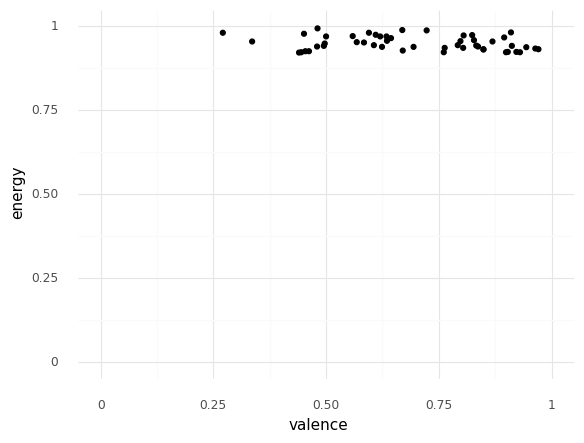

<ggplot: (8793063328101)>

In [16]:
(ggplot(large_energy_df, aes(x = "valence", y = "energy")) + 
geom_point() + 
theme_minimal() +
expand_limits(x = 0, y = 0) + 
xlim(0, 1)+ ylim(0, 1))

In [17]:
small_valence_df = df_combo.nsmallest(50, "valence") #smallest valence in our entire dataset
# small_valence_df
small_valence_df.head()

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,Hello,246933,8,0.424,0.2220,9,-15.053,0,0.0391,0.6460,0.000000,0.1480,0.0606,61.648,audio_features,6HMvJcdw6qLsyV1b5x29sa,spotify:track:6HMvJcdw6qLsyV1b5x29sa,https://api.spotify.com/v1/tracks/6HMvJcdw6qLs...,https://api.spotify.com/v1/audio-analysis/6HMv...,4
24,Sometimes It Snows in April,409000,12,0.494,0.0644,4,-23.939,1,0.0402,0.8330,0.000000,0.0969,0.0622,103.757,audio_features,1Az0fhiWi0EVS4cZ3FF20X,spotify:track:1Az0fhiWi0EVS4cZ3FF20X,https://api.spotify.com/v1/tracks/1Az0fhiWi0EV...,https://api.spotify.com/v1/audio-analysis/1Az0...,4
71,Blue Spanish Sky,238400,6,0.399,0.1140,9,-24.116,0,0.0370,0.7090,0.480000,0.1250,0.0780,113.769,audio_features,7ybeQwgAVDbKdfYvQnXHI4,spotify:track:7ybeQwgAVDbKdfYvQnXHI4,https://api.spotify.com/v1/tracks/7ybeQwgAVDbK...,https://api.spotify.com/v1/audio-analysis/7ybe...,3
95,Still Loving You,403453,7,0.282,0.6050,6,-4.916,0,0.0294,0.0047,0.001440,0.1030,0.0783,103.929,audio_features,0RdUX4WE0fO30VnlUbDVL6,spotify:track:0RdUX4WE0fO30VnlUbDVL6,https://api.spotify.com/v1/tracks/0RdUX4WE0fO3...,https://api.spotify.com/v1/audio-analysis/0RdU...,4
0,Older,333107,3,0.572,0.4390,5,-10.377,1,0.0258,0.1470,0.000379,0.0612,0.0794,147.741,audio_features,1oMNeGkqwyEOLMUTrgdIr2,spotify:track:1oMNeGkqwyEOLMUTrgdIr2,https://api.spotify.com/v1/tracks/1oMNeGkqwyEO...,https://api.spotify.com/v1/audio-analysis/1oMN...,4


In [18]:
# only want valence and energy info
small_valence = small_valence_df[valence_energy]
small_valence

,name,valence,energy
0,Hello,0.0606,0.2220
24,Sometimes It Snows in April,0.0622,0.0644
71,Blue Spanish Sky,0.0780,0.1140
95,Still Loving You,0.0783,0.6050
0,Older,0.0794,0.4390
27,One More Try - Remastered,0.0823,0.2910
22,Babe,0.0903,0.2040
10,You Are So Beautiful,0.0920,0.1820
86,Going Home (Theme of the Local Hero),0.0979,0.4820
40,Silent Lucidity - Remastered 2003,0.0981,0.6280


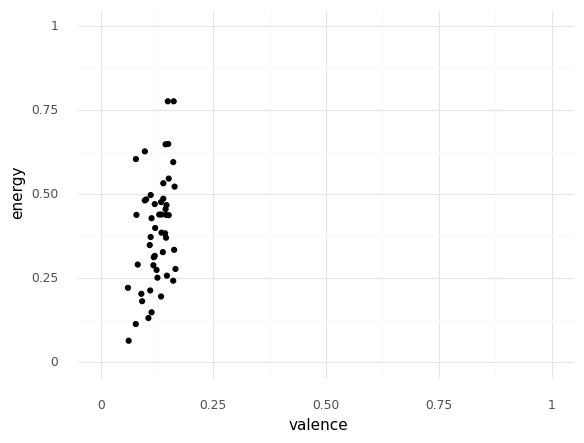

<ggplot: (8793063375761)>

In [19]:
(ggplot(small_valence_df, aes(x = "valence", y = "energy")) + 
geom_point() + 
theme_minimal() +
expand_limits(x = 0, y = 0) + 
xlim(0, 1)+ ylim(0, 1))

In [26]:
small_energy_df = df_combo.nsmallest(50, "energy") #smallest energy in our entire dataset
# small_energy_df
small_energy_df.head()

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
70,Longer,195067,8,0.308,0.0427,7,-24.709,1,0.0336,0.865,0.000000,0.1790,0.3830,158.399,audio_features,56ilrbKJF2bph5W6eZaM5E,spotify:track:56ilrbKJF2bph5W6eZaM5E,https://api.spotify.com/v1/tracks/56ilrbKJF2bp...,https://api.spotify.com/v1/audio-analysis/56il...,4
24,Sometimes It Snows in April,409000,12,0.494,0.0644,4,-23.939,1,0.0402,0.833,0.000000,0.0969,0.0622,103.757,audio_features,1Az0fhiWi0EVS4cZ3FF20X,spotify:track:1Az0fhiWi0EVS4cZ3FF20X,https://api.spotify.com/v1/tracks/1Az0fhiWi0EV...,https://api.spotify.com/v1/audio-analysis/1Az0...,4
1,This Woman's Work,214000,10,0.353,0.1130,8,-18.752,1,0.0399,0.888,0.000048,0.1210,0.1690,128.304,audio_features,6FN08oB3MT2BxYIJoR1CZ5,spotify:track:6FN08oB3MT2BxYIJoR1CZ5,https://api.spotify.com/v1/tracks/6FN08oB3MT2B...,https://api.spotify.com/v1/audio-analysis/6FN0...,4
71,Blue Spanish Sky,238400,6,0.399,0.1140,9,-24.116,0,0.0370,0.709,0.480000,0.1250,0.0780,113.769,audio_features,7ybeQwgAVDbKdfYvQnXHI4,spotify:track:7ybeQwgAVDbKdfYvQnXHI4,https://api.spotify.com/v1/tracks/7ybeQwgAVDbK...,https://api.spotify.com/v1/audio-analysis/7ybe...,3
26,Why Worry?,509067,5,0.591,0.1320,4,-21.243,1,0.0296,0.934,0.553000,0.2710,0.1060,93.714,audio_features,0NL5lqKSd0obXvKwfvyTKw,spotify:track:0NL5lqKSd0obXvKwfvyTKw,https://api.spotify.com/v1/tracks/0NL5lqKSd0ob...,https://api.spotify.com/v1/audio-analysis/0NL5...,4


In [27]:
# only want valence and energy info
small_energy = small_energy_df[valence_energy]
small_energy

,name,valence,energy
70,Longer,0.3830,0.0427
24,Sometimes It Snows in April,0.0622,0.0644
1,This Woman's Work,0.1690,0.1130
71,Blue Spanish Sky,0.0780,0.1140
26,Why Worry?,0.1060,0.1320
32,More Than Words,0.2390,0.1340
41,I Can't Make You Love Me,0.1130,0.1490
10,You Are So Beautiful,0.0920,0.1820
73,There's No Easy Way,0.1940,0.1840
33,Running To Stand Still - Remastered 2007,0.2240,0.1850


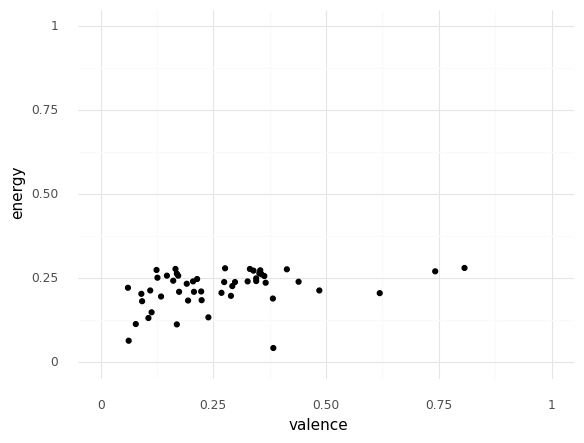

<ggplot: (8793070204905)>

In [28]:
(ggplot(small_energy_df, aes(x = "valence", y = "energy")) + 
geom_point() + 
theme_minimal() +
expand_limits(x = 0, y = 0) + 
xlim(0, 1)+ ylim(0, 1))

In [47]:
mid_low_energy = df_combo[(df_combo['energy'] >= 0.40) & (df_combo['energy'] <= 0.5)]
mid_low_energy

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,Every Breath You Take,253920,7,0.820,0.452,1,-9.796,1,0.0348,0.5430,0.002940,0.0714,0.740,117.401,audio_features,1JSTJqkT5qHq8MDJnJbRE1,spotify:track:1JSTJqkT5qHq8MDJnJbRE1,https://api.spotify.com/v1/tracks/1JSTJqkT5qHq...,https://api.spotify.com/v1/audio-analysis/1JST...,4
6,Don't Dream It's Over,236933,4,0.439,0.422,8,-17.227,1,0.0409,0.0148,0.000048,0.0697,0.551,81.833,audio_features,7G7tgVYORlDuVprcYHuFJh,spotify:track:7G7tgVYORlDuVprcYHuFJh,https://api.spotify.com/v1/tracks/7G7tgVYORlDu...,https://api.spotify.com/v1/audio-analysis/7G7t...,4
17,I Want to Know What Love Is - 1999 Remaster,304787,3,0.477,0.471,6,-10.036,1,0.0277,0.1930,0.000002,0.1310,0.423,81.204,audio_features,1JLn8RhQzHz3qDqsChcmBl,spotify:track:1JLn8RhQzHz3qDqsChcmBl,https://api.spotify.com/v1/tracks/1JLn8RhQzHz3...,https://api.spotify.com/v1/audio-analysis/1JLn...,4
18,Everywhere - 2017 Remaster,226653,3,0.730,0.487,4,-10.991,1,0.0303,0.2580,0.010000,0.0852,0.731,114.965,audio_features,254bXAqt3zP6P50BdQvEsq,spotify:track:254bXAqt3zP6P50BdQvEsq,https://api.spotify.com/v1/tracks/254bXAqt3zP6...,https://api.spotify.com/v1/audio-analysis/254b...,4
20,Time After Time,243067,4,0.724,0.436,0,-9.321,1,0.0282,0.5760,0.000001,0.0908,0.324,130.439,audio_features,1Jj6MF0xDOMA3Ut2Z368Bx,spotify:track:1Jj6MF0xDOMA3Ut2Z368Bx,https://api.spotify.com/v1/tracks/1Jj6MF0xDOMA...,https://api.spotify.com/v1/audio-analysis/1Jj6...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Vienna,214240,5,0.532,0.495,10,-6.662,1,0.0343,0.6590,0.000000,0.0754,0.308,124.936,audio_features,4U45aEWtQhrm8A5mxPaFZ7,spotify:track:4U45aEWtQhrm8A5mxPaFZ7,https://api.spotify.com/v1/tracks/4U45aEWtQhrm...,https://api.spotify.com/v1/audio-analysis/4U45...,4
93,Pilot Of The Airwaves (Re-Recorded / Remastered),226947,14,0.625,0.408,0,-12.627,1,0.0385,0.4760,0.000000,0.1640,0.604,119.259,audio_features,5e9AcaXYSeHVn3LL5j0XXT,spotify:track:5e9AcaXYSeHVn3LL5j0XXT,https://api.spotify.com/v1/tracks/5e9AcaXYSeHV...,https://api.spotify.com/v1/audio-analysis/5e9A...,4
94,Pilot of the Airwaves,235116,1,0.620,0.426,2,-13.791,1,0.0352,0.6710,0.000706,0.1020,0.614,119.650,audio_features,0aMgFXpZTDZvWqMXwPIMNK,spotify:track:0aMgFXpZTDZvWqMXwPIMNK,https://api.spotify.com/v1/tracks/0aMgFXpZTDZv...,https://api.spotify.com/v1/audio-analysis/0aMg...,4
98,There'll Be Sad Songs (To Make You Cry),292680,4,0.563,0.458,0,-7.673,1,0.0305,0.7480,0.000000,0.1030,0.259,79.738,audio_features,1mP8BJQBRZWjSQLVmxQEyG,spotify:track:1mP8BJQBRZWjSQLVmxQEyG,https://api.spotify.com/v1/tracks/1mP8BJQBRZWj...,https://api.spotify.com/v1/audio-analysis/1mP8...,4


In [48]:
mid_low_energy_df = mid_low_energy.nsmallest(50, "energy")
mid_low_energy_df.head()

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
30,"Beauty and the Beast - from the Soundtrack ""Be...",249240,9,0.463,0.400,6,-9.999,0,0.0308,0.643,0.000025,0.1310,0.121,77.314,audio_features,7B3UAPLYAbwXVgbHSKEaTw,spotify:track:7B3UAPLYAbwXVgbHSKEaTw,https://api.spotify.com/v1/tracks/7B3UAPLYAbwX...,https://api.spotify.com/v1/audio-analysis/7B3U...,4
93,I Have Nothing,289160,2,0.541,0.401,0,-10.499,1,0.0365,0.576,0.000000,0.1640,0.240,152.943,audio_features,31er9IGsfFbwqy1pH4aiTP,spotify:track:31er9IGsfFbwqy1pH4aiTP,https://api.spotify.com/v1/tracks/31er9IGsfFbw...,https://api.spotify.com/v1/audio-analysis/31er...,3
87,You Are Not Alone,345600,9,0.651,0.402,11,-9.303,1,0.0280,0.639,0.000077,0.0765,0.258,119.873,audio_features,3AoeaZs8dFemFJr3JdzOL0,spotify:track:3AoeaZs8dFemFJr3JdzOL0,https://api.spotify.com/v1/tracks/3AoeaZs8dFem...,https://api.spotify.com/v1/audio-analysis/3Aoe...,4
72,On My Own,290840,2,0.620,0.402,5,-12.964,1,0.0264,0.337,0.000061,0.3120,0.483,92.093,audio_features,5HrVgmO1govSOrPUehW1VV,spotify:track:5HrVgmO1govSOrPUehW1VV,https://api.spotify.com/v1/tracks/5HrVgmO1govS...,https://api.spotify.com/v1/audio-analysis/5HrV...,4
85,Tell Me Something Good,280040,2,0.724,0.404,1,-9.186,1,0.2310,0.657,0.000000,0.1160,0.794,73.983,audio_features,0AECVMjxepWdsjDb49JFRd,spotify:track:0AECVMjxepWdsjDb49JFRd,https://api.spotify.com/v1/tracks/0AECVMjxepWd...,https://api.spotify.com/v1/audio-analysis/0AEC...,4


In [52]:
mid_low_energy_songs = mid_low_energy_df[valence_energy]
mid_low_energy_songs

,name,valence,energy
30,"Beauty and the Beast - from the Soundtrack ""Be...",0.1210,0.400
93,I Have Nothing,0.2400,0.401
87,You Are Not Alone,0.2580,0.402
72,On My Own,0.4830,0.402
85,Tell Me Something Good,0.7940,0.404
99,"Say You, Say Me",0.2570,0.405
54,What's Love Got to Do with It,0.7920,0.406
19,Cowboys and Angels - Remastered,0.2980,0.407
67,Your Latest Trick,0.2640,0.408
93,Pilot Of The Airwaves (Re-Recorded / Remastered),0.6040,0.408


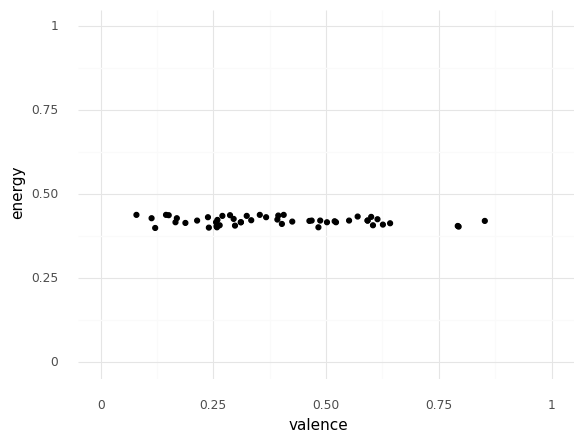

<ggplot: (8793070521777)>

In [54]:
(ggplot(mid_low_energy_songs, aes(x = "valence", y = "energy")) + 
geom_point() + 
theme_minimal() +
expand_limits(x = 0, y = 0) + 
xlim(0, 1)+ ylim(0, 1))

In [50]:
mid_high_energy = df_combo[(df_combo['energy'] >= 0.50) & (df_combo['energy'] <= 0.6)]
mid_high_energy

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
4,If You Leave Me Now,235373,4,0.434,0.563,11,-6.784,1,0.0268,0.0197,0.000824,0.1280,0.275,104.183,audio_features,0KMGxYKeUzK9wc5DZCt3HT,spotify:track:0KMGxYKeUzK9wc5DZCt3HT,https://api.spotify.com/v1/tracks/0KMGxYKeUzK9...,https://api.spotify.com/v1/audio-analysis/0KMG...,4
8,Purple Rain,522307,9,0.383,0.570,10,-7.019,1,0.0318,0.0416,0.006830,0.7460,0.183,114.147,audio_features,4m2GdLuOhDt6rFbgOFMHIL,spotify:track:4m2GdLuOhDt6rFbgOFMHIL,https://api.spotify.com/v1/tracks/4m2GdLuOhDt6...,https://api.spotify.com/v1/audio-analysis/4m2G...,4
10,Arthur's Theme (Best That You Can Do),234493,1,0.526,0.515,9,-11.169,1,0.0389,0.1690,0.000816,0.1810,0.518,136.543,audio_features,5fnOrhQ4KgT5irGCjIccGH,spotify:track:5fnOrhQ4KgT5irGCjIccGH,https://api.spotify.com/v1/tracks/5fnOrhQ4KgT5...,https://api.spotify.com/v1/audio-analysis/5fnO...,4
11,Holding Back the Years - 2008 Remaster,269840,7,0.707,0.514,9,-8.885,0,0.0281,0.5800,0.000159,0.0953,0.524,86.035,audio_features,1yg7fwwYmx9DQ2TdXUmfpJ,spotify:track:1yg7fwwYmx9DQ2TdXUmfpJ,https://api.spotify.com/v1/tracks/1yg7fwwYmx9D...,https://api.spotify.com/v1/audio-analysis/1yg7...,4
12,Heart Of Glass - Special Mix,275733,1,0.694,0.577,4,-14.630,1,0.0308,0.0150,0.008360,0.0853,0.845,114.478,audio_features,0a4agFmqHXxcZl1nho1BxM,spotify:track:0a4agFmqHXxcZl1nho1BxM,https://api.spotify.com/v1/tracks/0a4agFmqHXxc...,https://api.spotify.com/v1/audio-analysis/0a4a...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Please,214000,1,0.612,0.561,6,-10.209,1,0.0320,0.0701,0.000951,0.6210,0.206,139.365,audio_features,1W3JN0T0B913Yw5I4S0AgR,spotify:track:1W3JN0T0B913Yw5I4S0AgR,https://api.spotify.com/v1/tracks/1W3JN0T0B913...,https://api.spotify.com/v1/audio-analysis/1W3J...,4
82,Piano Man,339000,2,0.331,0.550,0,-6.483,1,0.0272,0.6050,0.000004,0.1920,0.429,177.734,audio_features,70C4NyhjD5OZUMzvWZ3njJ,spotify:track:70C4NyhjD5OZUMzvWZ3njJ,https://api.spotify.com/v1/tracks/70C4NyhjD5OZ...,https://api.spotify.com/v1/audio-analysis/70C4...,3
88,The Flame,338800,3,0.629,0.581,4,-11.856,1,0.0270,0.5130,0.000002,0.0755,0.359,97.074,audio_features,528CAH5pTLq86oZ52fHifA,spotify:track:528CAH5pTLq86oZ52fHifA,https://api.spotify.com/v1/tracks/528CAH5pTLq8...,https://api.spotify.com/v1/audio-analysis/528C...,4
97,These Dreams - Remastered 2000,254133,4,0.538,0.571,11,-8.551,1,0.0301,0.4490,0.000018,0.1890,0.306,78.950,audio_features,521WSlpe1Pisn7BcEoefp2,spotify:track:521WSlpe1Pisn7BcEoefp2,https://api.spotify.com/v1/tracks/521WSlpe1Pis...,https://api.spotify.com/v1/audio-analysis/521W...,4


In [51]:
mid_high_energy_df = mid_high_energy.nlargest(50, "energy")
mid_high_energy_df.head()

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
88,Chain Reaction,227880,4,0.806,0.600,11,-9.642,1,0.0329,0.0910,0.000436,0.0836,0.756,127.814,audio_features,3N3UmpRUvoZQrUREMen54e,spotify:track:3N3UmpRUvoZQrUREMen54e,https://api.spotify.com/v1/tracks/3N3UmpRUvoZQ...,https://api.spotify.com/v1/audio-analysis/3N3U...,4
80,Eye of the Tiger,245640,4,0.817,0.599,0,-9.249,0,0.0328,0.1320,0.000311,0.0873,0.548,108.873,audio_features,2KH16WveTQWT6KOG9Rg6e2,spotify:track:2KH16WveTQWT6KOG9Rg6e2,https://api.spotify.com/v1/tracks/2KH16WveTQWT...,https://api.spotify.com/v1/audio-analysis/2KH1...,4
37,Boys Don't Cry,154667,3,0.463,0.597,11,-13.515,0,0.0637,0.0178,0.000000,0.1770,0.735,169.670,audio_features,1YQCRXscu8xE74BVVMUCRr,spotify:track:1YQCRXscu8xE74BVVMUCRr,https://api.spotify.com/v1/tracks/1YQCRXscu8xE...,https://api.spotify.com/v1/audio-analysis/1YQC...,4
20,Skies the Limit,225307,1,0.652,0.597,7,-11.585,1,0.0278,0.4080,0.000063,0.1430,0.578,119.970,audio_features,0Cq7FAM0nK4xRXL5dSbGIS,spotify:track:0Cq7FAM0nK4xRXL5dSbGIS,https://api.spotify.com/v1/tracks/0Cq7FAM0nK4x...,https://api.spotify.com/v1/audio-analysis/0Cq7...,4
56,Jane Says,287000,9,0.402,0.597,2,-9.258,1,0.0327,0.0385,0.000002,0.1090,0.496,81.806,audio_features,7c1Dar0pIAW7w5TzaGjt9t,spotify:track:7c1Dar0pIAW7w5TzaGjt9t,https://api.spotify.com/v1/tracks/7c1Dar0pIAW7...,https://api.spotify.com/v1/audio-analysis/7c1D...,4


In [53]:
mid_high_energy_songs = mid_high_energy_df[valence_energy]
mid_high_energy_songs

,name,valence,energy
88,Chain Reaction,0.756,0.600
80,Eye of the Tiger,0.548,0.599
37,Boys Don't Cry,0.735,0.597
20,Skies the Limit,0.578,0.597
56,Jane Says,0.496,0.597
48,Bed Of Roses,0.161,0.596
52,Manic Monday,0.853,0.594
77,Through the Fire,0.428,0.593
24,Ghost Town,0.595,0.590
4,'74-'75,0.430,0.590


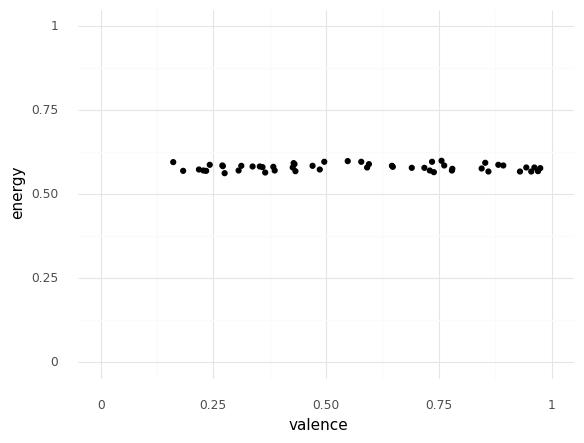

<ggplot: (8793070536017)>

In [55]:
(ggplot(mid_high_energy_songs, aes(x = "valence", y = "energy")) + 
geom_point() + 
theme_minimal() +
expand_limits(x = 0, y = 0) + 
xlim(0, 1)+ ylim(0, 1))

In [56]:
mid_low_valence = df_combo[(df_combo['valence'] >= 0.40) & (df_combo['valence'] <= 0.5)]
mid_low_valence

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
14,The Lady In Red,256173,4,0.548,0.294,10,-17.112,1,0.0333,0.33200,0.000003,0.0392,0.491,76.698,audio_features,5tawGZuoaKGinhLIn9U5X4,spotify:track:5tawGZuoaKGinhLIn9U5X4,https://api.spotify.com/v1/tracks/5tawGZuoaKGi...,https://api.spotify.com/v1/audio-analysis/5taw...,4
15,Just Like Heaven,212013,9,0.437,0.940,9,-6.946,1,0.0426,0.05240,0.000573,0.2220,0.480,151.417,audio_features,4NnWuGQujzWUEg0uZokO5M,spotify:track:4NnWuGQujzWUEg0uZokO5M,https://api.spotify.com/v1/tracks/4NnWuGQujzWU...,https://api.spotify.com/v1/audio-analysis/4NnW...,4
17,I Want to Know What Love Is - 1999 Remaster,304787,3,0.477,0.471,6,-10.036,1,0.0277,0.19300,0.000002,0.1310,0.423,81.204,audio_features,1JLn8RhQzHz3qDqsChcmBl,spotify:track:1JLn8RhQzHz3qDqsChcmBl,https://api.spotify.com/v1/tracks/1JLn8RhQzHz3...,https://api.spotify.com/v1/audio-analysis/1JLn...,4
24,Dancing In the Dark,241307,11,0.527,0.942,1,-5.640,0,0.0366,0.01150,0.000000,0.1880,0.495,148.723,audio_features,7FwBtcecmlpc1sLySPXeGE,spotify:track:7FwBtcecmlpc1sLySPXeGE,https://api.spotify.com/v1/tracks/7FwBtcecmlpc...,https://api.spotify.com/v1/audio-analysis/7FwB...,4
27,Keep on Loving You,200293,2,0.306,0.722,0,-5.963,1,0.0340,0.05190,0.000000,0.1170,0.410,174.732,audio_features,4rcHWl68ai6KvpXlc8vbnE,spotify:track:4rcHWl68ai6KvpXlc8vbnE,https://api.spotify.com/v1/tracks/4rcHWl68ai6K...,https://api.spotify.com/v1/audio-analysis/4rcH...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,Eyes of Blue - Remastered,241080,4,0.600,0.551,0,-9.921,1,0.0231,0.08350,0.000033,0.1220,0.474,80.044,audio_features,2wDIKKUiyrGBhZMKMewcZ5,spotify:track:2wDIKKUiyrGBhZMKMewcZ5,https://api.spotify.com/v1/tracks/2wDIKKUiyrGB...,https://api.spotify.com/v1/audio-analysis/2wDI...,4
56,Human Touch,388800,1,0.651,0.516,0,-13.628,1,0.0277,0.00244,0.000059,0.0973,0.453,115.154,audio_features,1o53HbxmOy5TzThJdBaDZb,spotify:track:1o53HbxmOy5TzThJdBaDZb,https://api.spotify.com/v1/tracks/1o53HbxmOy5T...,https://api.spotify.com/v1/audio-analysis/1o53...,4
62,(Oh) Pretty Woman - 2015 Remaster,172671,6,0.441,0.970,1,-2.100,0,0.0708,0.19200,0.000002,0.3120,0.500,128.289,audio_features,7ptv3yXdBWwzO7rVA62rwy,spotify:track:7ptv3yXdBWwzO7rVA62rwy,https://api.spotify.com/v1/tracks/7ptv3yXdBWwz...,https://api.spotify.com/v1/audio-analysis/7ptv...,4
82,Piano Man,339000,2,0.331,0.550,0,-6.483,1,0.0272,0.60500,0.000004,0.1920,0.429,177.734,audio_features,70C4NyhjD5OZUMzvWZ3njJ,spotify:track:70C4NyhjD5OZUMzvWZ3njJ,https://api.spotify.com/v1/tracks/70C4NyhjD5OZ...,https://api.spotify.com/v1/audio-analysis/70C4...,3


In [57]:
mid_low_valence_df = mid_low_valence.nsmallest(50, "valence")
mid_low_valence_df.head()

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
7,Ordinary World,340200,2,0.472,0.652,1,-10.171,0,0.0305,0.0131,0.000011,0.1400,0.401,140.124,audio_features,0wokCRaKD0zPNhMRXAgVsr,spotify:track:0wokCRaKD0zPNhMRXAgVsr,https://api.spotify.com/v1/tracks/0wokCRaKD0zP...,https://api.spotify.com/v1/audio-analysis/0wok...,4
45,Heaven,243667,4,0.340,0.412,9,-13.727,0,0.0268,0.0596,0.000000,0.1170,0.402,69.857,audio_features,0GIOPJKTSxagq3rq07Ch3U,spotify:track:0GIOPJKTSxagq3rq07Ch3U,https://api.spotify.com/v1/tracks/0GIOPJKTSxag...,https://api.spotify.com/v1/audio-analysis/0GIO...,4
77,Hard Habit to Break - 2006 Remaster,283733,3,0.584,0.612,2,-5.833,1,0.0283,0.4480,0.000000,0.1710,0.402,81.182,audio_features,3Tows9RnoAq9CmMJaII2cO,spotify:track:3Tows9RnoAq9CmMJaII2cO,https://api.spotify.com/v1/tracks/3Tows9RnoAq9...,https://api.spotify.com/v1/audio-analysis/3Tow...,4
99,Better Days,331067,3,0.604,0.439,8,-11.943,1,0.0363,0.6650,0.000000,0.1390,0.406,148.243,audio_features,5RQHeyMeUSWRqbDN0rWk2t,spotify:track:5RQHeyMeUSWRqbDN0rWk2t,https://api.spotify.com/v1/tracks/5RQHeyMeUSWR...,https://api.spotify.com/v1/audio-analysis/5RQH...,4
19,Name,270000,6,0.464,0.701,9,-5.943,1,0.0341,0.0691,0.001820,0.0766,0.407,73.970,audio_features,1G8jae4jD8mwkXdodqHsBM,spotify:track:1G8jae4jD8mwkXdodqHsBM,https://api.spotify.com/v1/tracks/1G8jae4jD8mw...,https://api.spotify.com/v1/audio-analysis/1G8j...,4


In [58]:
mid_low_valence_songs = mid_low_valence_df[valence_energy]
mid_low_valence_songs

,name,valence,energy
7,Ordinary World,0.401,0.652
45,Heaven,0.402,0.412
77,Hard Habit to Break - 2006 Remaster,0.402,0.612
99,Better Days,0.406,0.439
19,Name,0.407,0.701
27,Keep on Loving You,0.410,0.722
86,Love Bites - Remastered 2017,0.412,0.743
97,I'll Be Over You,0.413,0.277
83,The First Cut Is the Deepest - 2008 Remaster,0.414,0.502
90,99 Red Balloons,0.415,0.482


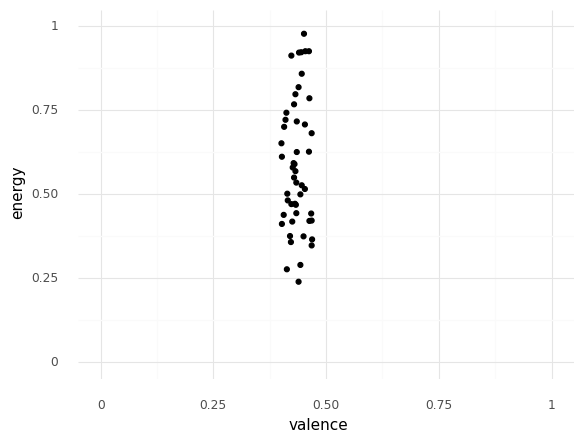

<ggplot: (8793070677205)>

In [59]:
(ggplot(mid_low_valence_songs, aes(x = "valence", y = "energy")) + 
geom_point() + 
theme_minimal() +
expand_limits(x = 0, y = 0) + 
xlim(0, 1)+ ylim(0, 1))

In [64]:
mid_high_valence = df_combo[(df_combo['valence'] >= 0.50) & (df_combo['valence'] <= 0.55)]
mid_high_valence

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
5,Drive,234493,4,0.582,0.606,6,-9.961,1,0.0289,0.124000,0.001390,0.1510,0.504,111.441,audio_features,3wfujdbamR3Z46F4xav7LM,spotify:track:3wfujdbamR3Z46F4xav7LM,https://api.spotify.com/v1/tracks/3wfujdbamR3Z...,https://api.spotify.com/v1/audio-analysis/3wfu...,5
10,Arthur's Theme (Best That You Can Do),234493,1,0.526,0.515,9,-11.169,1,0.0389,0.169000,0.000816,0.1810,0.518,136.543,audio_features,5fnOrhQ4KgT5irGCjIccGH,spotify:track:5fnOrhQ4KgT5irGCjIccGH,https://api.spotify.com/v1/tracks/5fnOrhQ4KgT5...,https://api.spotify.com/v1/audio-analysis/5fnO...,4
11,Holding Back the Years - 2008 Remaster,269840,7,0.707,0.514,9,-8.885,0,0.0281,0.580000,0.000159,0.0953,0.524,86.035,audio_features,1yg7fwwYmx9DQ2TdXUmfpJ,spotify:track:1yg7fwwYmx9DQ2TdXUmfpJ,https://api.spotify.com/v1/tracks/1yg7fwwYmx9D...,https://api.spotify.com/v1/audio-analysis/1yg7...,4
25,"Take My Breath Away - Love Theme from ""Top Gun""",255733,5,0.497,0.719,6,-9.397,1,0.0266,0.061300,0.000000,0.4110,0.547,95.769,audio_features,15MJ5NThPjj6xhPcts8MiY,spotify:track:15MJ5NThPjj6xhPcts8MiY,https://api.spotify.com/v1/tracks/15MJ5NThPjj6...,https://api.spotify.com/v1/audio-analysis/15MJ...,4
46,All Right,253653,6,0.711,0.647,6,-5.225,0,0.0353,0.170000,0.000000,0.2340,0.504,132.752,audio_features,5tE2kEW1Jom3Qc93UPBT79,spotify:track:5tE2kEW1Jom3Qc93UPBT79,https://api.spotify.com/v1/tracks/5tE2kEW1Jom3...,https://api.spotify.com/v1/audio-analysis/5tE2...,4
52,Is This Love - 2017 Remaster,284600,4,0.333,0.790,0,-6.802,1,0.0386,0.109000,0.000000,0.1150,0.534,180.356,audio_features,0LIEDX1qDrcsFbWCUsYJmR,spotify:track:0LIEDX1qDrcsFbWCUsYJmR,https://api.spotify.com/v1/tracks/0LIEDX1qDrcs...,https://api.spotify.com/v1/audio-analysis/0LIE...,4
53,Cold as Ice - 2008 Remaster,200027,3,0.554,0.708,3,-5.318,0,0.0271,0.059400,0.000003,0.1430,0.512,131.157,audio_features,3iM9wFGlyR28IBZrXYZK9j,spotify:track:3iM9wFGlyR28IBZrXYZK9j,https://api.spotify.com/v1/tracks/3iM9wFGlyR28...,https://api.spotify.com/v1/audio-analysis/3iM9...,4
80,Eye of the Tiger,245640,4,0.817,0.599,0,-9.249,0,0.0328,0.132000,0.000311,0.0873,0.548,108.873,audio_features,2KH16WveTQWT6KOG9Rg6e2,spotify:track:2KH16WveTQWT6KOG9Rg6e2,https://api.spotify.com/v1/tracks/2KH16WveTQWT...,https://api.spotify.com/v1/audio-analysis/2KH1...,4
4,Nothing's Gonna Stop Us Now,270333,2,0.643,0.802,6,-4.920,1,0.0227,0.029900,0.000000,0.0719,0.530,95.990,audio_features,3X7uFMzJrEE0sxn62qd8Ch,spotify:track:3X7uFMzJrEE0sxn62qd8Ch,https://api.spotify.com/v1/tracks/3X7uFMzJrEE0...,https://api.spotify.com/v1/audio-analysis/3X7u...,4
15,The Way It Is,297853,5,0.582,0.689,7,-12.203,1,0.0277,0.607000,0.057100,0.1450,0.531,111.166,audio_features,6V50MyHPGhEmwYu0Wdyf0t,spotify:track:6V50MyHPGhEmwYu0Wdyf0t,https://api.spotify.com/v1/tracks/6V50MyHPGhEm...,https://api.spotify.com/v1/audio-analysis/6V50...,4


In [65]:
mid_high_valence_df = mid_high_valence.nlargest(50, "energy")

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
62,(Oh) Pretty Woman - 2015 Remaster,172671,6,0.441,0.970,1,-2.100,0,0.0708,0.1920,0.000002,0.312,0.500,128.289,audio_features,7ptv3yXdBWwzO7rVA62rwy,spotify:track:7ptv3yXdBWwzO7rVA62rwy,https://api.spotify.com/v1/tracks/7ptv3yXdBWwz...,https://api.spotify.com/v1/audio-analysis/7ptv...,4
27,It's My Life,224493,1,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.347,0.544,119.992,audio_features,0v1XpBHnsbkCn7iJ9Ucr1l,spotify:track:0v1XpBHnsbkCn7iJ9Ucr1l,https://api.spotify.com/v1/tracks/0v1XpBHnsbkC...,https://api.spotify.com/v1/audio-analysis/0v1X...,4
60,Crazy Train,293183,2,0.454,0.913,9,-4.008,1,0.1070,0.4080,0.000271,0.248,0.521,137.688,audio_features,7ACxUo21jtTHzy7ZEV56vU,spotify:track:7ACxUo21jtTHzy7ZEV56vU,https://api.spotify.com/v1/tracks/7ACxUo21jtTH...,https://api.spotify.com/v1/audio-analysis/7ACx...,4
47,Let's Get Rocked,295957,1,0.564,0.888,5,-6.763,1,0.0325,0.0109,0.000067,0.177,0.526,91.989,audio_features,0LoH6lFQLNscy3RyljAewK,spotify:track:0LoH6lFQLNscy3RyljAewK,https://api.spotify.com/v1/tracks/0LoH6lFQLNsc...,https://api.spotify.com/v1/audio-analysis/0LoH...,4
96,The Way You Make Me Feel - 2012 Remaster,298120,2,0.877,0.854,1,-4.523,1,0.1470,0.0544,0.000055,0.144,0.540,114.472,audio_features,0sKlV58cODrjxGFOyf9IXY,spotify:track:0sKlV58cODrjxGFOyf9IXY,https://api.spotify.com/v1/tracks/0sKlV58cODrj...,https://api.spotify.com/v1/audio-analysis/0sKl...,4


In [66]:
mid_high_valence_songs = mid_high_valence_df[valence_energy]
mid_high_valence_songs

,name,valence,energy
62,(Oh) Pretty Woman - 2015 Remaster,0.500,0.970
27,It's My Life,0.544,0.913
60,Crazy Train,0.521,0.913
47,Let's Get Rocked,0.526,0.888
96,The Way You Make Me Feel - 2012 Remaster,0.540,0.854
21,Love My Way,0.520,0.850
46,Common People,0.538,0.839
66,The Look,0.541,0.838
68,Girl You Know It's True,0.526,0.822
67,Knocking At Your Back Door,0.525,0.818


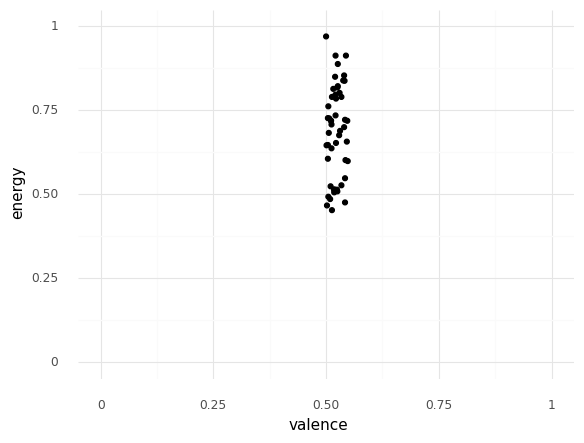

<ggplot: (8793070933893)>

In [67]:
(ggplot(mid_high_valence_songs, aes(x = "valence", y = "energy")) + 
geom_point() + 
theme_minimal() +
expand_limits(x = 0, y = 0) + 
xlim(0, 1)+ ylim(0, 1))

In [80]:
m_high_valence = df_combo[(df_combo['valence'] >= 0.6) & (df_combo['valence'] <= 0.8)]
m_high_valence

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,Every Breath You Take,253920,7,0.820,0.452,1,-9.796,1,0.0348,0.543000,0.002940,0.0714,0.740,117.401,audio_features,1JSTJqkT5qHq8MDJnJbRE1,spotify:track:1JSTJqkT5qHq8MDJnJbRE1,https://api.spotify.com/v1/tracks/1JSTJqkT5qHq...,https://api.spotify.com/v1/audio-analysis/1JST...,4
1,Don't You (Forget About Me),263040,1,0.660,0.816,2,-6.610,1,0.0299,0.168000,0.018100,0.0608,0.678,111.346,audio_features,3fH4KjXFYMmljxrcGrbPj9,spotify:track:3fH4KjXFYMmljxrcGrbPj9,https://api.spotify.com/v1/tracks/3fH4KjXFYMml...,https://api.spotify.com/v1/audio-analysis/3fH4...,4
3,Livin' On A Prayer,249293,3,0.534,0.887,0,-3.777,1,0.0345,0.076800,0.000099,0.3250,0.720,122.494,audio_features,0J6mQxEZnlRt9ymzFntA6z,spotify:track:0J6mQxEZnlRt9ymzFntA6z,https://api.spotify.com/v1/tracks/0J6mQxEZnlRt...,https://api.spotify.com/v1/audio-analysis/0J6m...,4
7,More Than This,270652,1,0.653,0.666,6,-7.808,1,0.0249,0.050800,0.046600,0.1390,0.765,128.505,audio_features,6N7gPTru90HYLRUIVDQ185,spotify:track:6N7gPTru90HYLRUIVDQ185,https://api.spotify.com/v1/tracks/6N7gPTru90HY...,https://api.spotify.com/v1/audio-analysis/6N7g...,4
13,Crazy Little Thing Called Love - Remastered 2011,163373,5,0.599,0.761,0,-6.887,1,0.0421,0.713000,0.000005,0.3490,0.712,77.015,audio_features,6xdLJrVj4vIXwhuG8TMopk,spotify:track:6xdLJrVj4vIXwhuG8TMopk,https://api.spotify.com/v1/tracks/6xdLJrVj4vIX...,https://api.spotify.com/v1/audio-analysis/6xdL...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Pilot of the Airwaves,235116,1,0.620,0.426,2,-13.791,1,0.0352,0.671000,0.000706,0.1020,0.614,119.650,audio_features,0aMgFXpZTDZvWqMXwPIMNK,spotify:track:0aMgFXpZTDZvWqMXwPIMNK,https://api.spotify.com/v1/tracks/0aMgFXpZTDZv...,https://api.spotify.com/v1/audio-analysis/0aMg...,4
96,Suedehead - 2011 Remaster,235520,7,0.529,0.989,2,-4.500,1,0.0420,0.001260,0.001480,0.0567,0.669,142.290,audio_features,76HJoPhDFxD7rizsbCmZND,spotify:track:76HJoPhDFxD7rizsbCmZND,https://api.spotify.com/v1/tracks/76HJoPhDFxD7...,https://api.spotify.com/v1/audio-analysis/76HJ...,4
4,Orange Crush - Remastered,231640,7,0.568,0.701,9,-10.453,1,0.0400,0.000613,0.002580,0.1700,0.638,120.678,audio_features,7sNhXWrg9eW3qRqeuePaIC,spotify:track:7sNhXWrg9eW3qRqeuePaIC,https://api.spotify.com/v1/tracks/7sNhXWrg9eW3...,https://api.spotify.com/v1/audio-analysis/7sNh...,4
7,Roam,295133,6,0.636,0.939,9,-5.551,1,0.0837,0.048500,0.000007,0.2710,0.694,134.937,audio_features,5fqcIHU6DhQtFKVO5XSdQs,spotify:track:5fqcIHU6DhQtFKVO5XSdQs,https://api.spotify.com/v1/tracks/5fqcIHU6DhQt...,https://api.spotify.com/v1/audio-analysis/5fqc...,4


In [84]:
m_high_valence_df = m_high_valence.nsmallest(50, "energy")

In [85]:
m_high_valence_songs = m_high_valence_df[valence_energy]
m_high_valence_songs

,name,valence,energy
67,I Don't Want to Lose Your Love,0.619,0.206
83,Kiss,0.742,0.271
9,Taken In,0.701,0.292
30,Just The Two Of Us,0.608,0.326
77,The Joker,0.719,0.339
68,Englishman In New York,0.647,0.347
81,Top Of The World,0.663,0.349
16,How Deep Is Your Love,0.674,0.357
58,Africa,0.732,0.373
14,Desafinado (with Astrud Gilberto),0.632,0.390


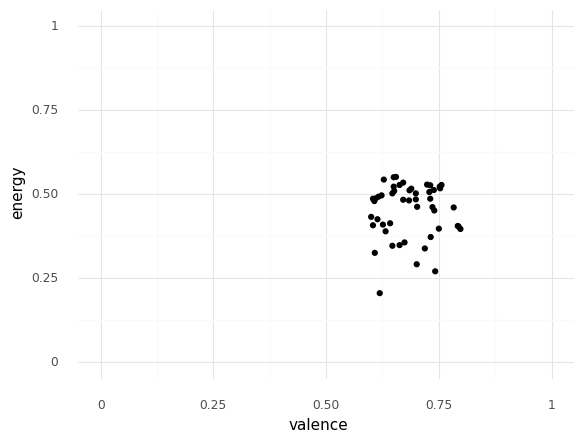

<ggplot: (8793063374761)>

In [86]:
(ggplot(m_high_valence_songs, aes(x = "valence", y = "energy")) + 
geom_point() + 
theme_minimal() +
expand_limits(x = 0, y = 0) + 
xlim(0, 1)+ ylim(0, 1))

In [88]:
m_low_valence = df_combo[(df_combo['valence'] >= 0.2) & (df_combo['valence'] <= 0.4)]
m_low_valence

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
4,If You Leave Me Now,235373,4,0.434,0.563,11,-6.784,1,0.0268,0.0197,0.000824,0.1280,0.275,104.183,audio_features,0KMGxYKeUzK9wc5DZCt3HT,spotify:track:0KMGxYKeUzK9wc5DZCt3HT,https://api.spotify.com/v1/tracks/0KMGxYKeUzK9...,https://api.spotify.com/v1/audio-analysis/0KMG...,4
20,Time After Time,243067,4,0.724,0.436,0,-9.321,1,0.0282,0.5760,0.000001,0.0908,0.324,130.439,audio_features,1Jj6MF0xDOMA3Ut2Z368Bx,spotify:track:1Jj6MF0xDOMA3Ut2Z368Bx,https://api.spotify.com/v1/tracks/1Jj6MF0xDOMA...,https://api.spotify.com/v1/audio-analysis/1Jj6...,4
21,True - Single Edit,329147,2,0.742,0.533,0,-9.098,1,0.0288,0.4590,0.148000,0.0640,0.391,97.395,audio_features,6eDYgjKl4vUgRusxb7THDu,spotify:track:6eDYgjKl4vUgRusxb7THDu,https://api.spotify.com/v1/tracks/6eDYgjKl4vUg...,https://api.spotify.com/v1/audio-analysis/6eDY...,4
22,"Up Where We Belong - From ""An Officer And A Ge...",232573,11,0.632,0.305,2,-11.842,1,0.0326,0.6140,0.000020,0.0713,0.238,139.935,audio_features,1h22h211rde6dDCeW2hXpN,spotify:track:1h22h211rde6dDCeW2hXpN,https://api.spotify.com/v1/tracks/1h22h211rde6...,https://api.spotify.com/v1/audio-analysis/1h22...,4
23,If You Don't Know Me by Now - 2008 Remaster,204000,9,0.638,0.352,10,-9.266,1,0.0268,0.4920,0.000000,0.1050,0.204,94.173,audio_features,7DFawVSjI88xR9mjnWwURg,spotify:track:7DFawVSjI88xR9mjnWwURg,https://api.spotify.com/v1/tracks/7DFawVSjI88x...,https://api.spotify.com/v1/audio-analysis/7DFa...,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,These Dreams - Remastered 2000,254133,4,0.538,0.571,11,-8.551,1,0.0301,0.4490,0.000018,0.1890,0.306,78.950,audio_features,521WSlpe1Pisn7BcEoefp2,spotify:track:521WSlpe1Pisn7BcEoefp2,https://api.spotify.com/v1/tracks/521WSlpe1Pis...,https://api.spotify.com/v1/audio-analysis/521W...,4
98,There'll Be Sad Songs (To Make You Cry),292680,4,0.563,0.458,0,-7.673,1,0.0305,0.7480,0.000000,0.1030,0.259,79.738,audio_features,1mP8BJQBRZWjSQLVmxQEyG,spotify:track:1mP8BJQBRZWjSQLVmxQEyG,https://api.spotify.com/v1/tracks/1mP8BJQBRZWj...,https://api.spotify.com/v1/audio-analysis/1mP8...,4
6,Miss Sarajevo,310907,6,0.719,0.582,4,-11.091,1,0.0254,0.5090,0.721000,0.1080,0.383,105.078,audio_features,6x5pI6n5feaWcP8jCdTk3E,spotify:track:6x5pI6n5feaWcP8jCdTk3E,https://api.spotify.com/v1/tracks/6x5pI6n5feaW...,https://api.spotify.com/v1/audio-analysis/6x5p...,4
8,The Living Years,330267,2,0.518,0.417,8,-13.268,1,0.0325,0.5800,0.000000,0.0722,0.311,97.630,audio_features,7tJnjRY2js0yXtNUWE4fgF,spotify:track:7tJnjRY2js0yXtNUWE4fgF,https://api.spotify.com/v1/tracks/7tJnjRY2js0y...,https://api.spotify.com/v1/audio-analysis/7tJn...,4


In [89]:
m_low_valence_df = m_low_valence.nlargest(50, "energy")

In [90]:
m_low_valence_songs = m_low_valence_df[valence_energy]
m_low_valence_songs

,name,valence,energy
14,Kickstart My Heart,0.271,0.981
54,Welcome To The Jungle,0.336,0.955
45,Lay Your Hands On Me,0.283,0.912
98,Poison,0.260,0.908
40,Rock of Ages,0.386,0.890
3,Vogue,0.329,0.880
44,Bad,0.339,0.869
18,Somebody to Love,0.364,0.863
54,Just Like Paradise,0.376,0.853
91,Spellbound,0.302,0.853


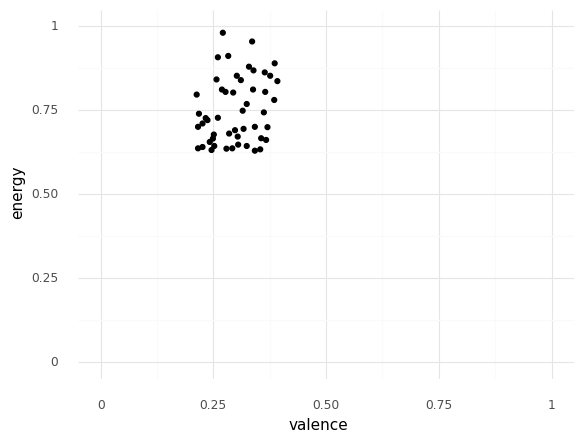

<ggplot: (8793063370193)>

In [91]:
(ggplot(m_low_valence_songs, aes(x = "valence", y = "energy")) + 
geom_point() + 
theme_minimal() +
expand_limits(x = 0, y = 0) + 
xlim(0, 1)+ ylim(0, 1))

In [78]:
song = df_combo["name"] == "Just the Way You Are"
song

0     False
1     False
2     False
3     False
4     False
      ...  
6     False
7     False
8     False
9     False
10    False
Name: name, Length: 911, dtype: bool

In [79]:
df_combo.loc[song]

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
84,Just the Way You Are,290573,3,0.589,0.453,7,-8.912,1,0.0397,0.703,0.000025,0.134,0.513,139.148,audio_features,49MHCPzvMLXhRjDantBMVH,spotify:track:49MHCPzvMLXhRjDantBMVH,https://api.spotify.com/v1/tracks/49MHCPzvMLXh...,https://api.spotify.com/v1/audio-analysis/49MH...,4
